In [75]:
# Importing required liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)



In [76]:
# Importing dataset
bb = pd.read_csv(r"C:\Users\SREEDHAR\Documents\Data science\ML projects\baseball.csv")

In [77]:
bb.shape

(30, 17)

In [78]:
# Printing 5 rows of datset
bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [79]:
# Checking info
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [80]:
# Checking data Statistics
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


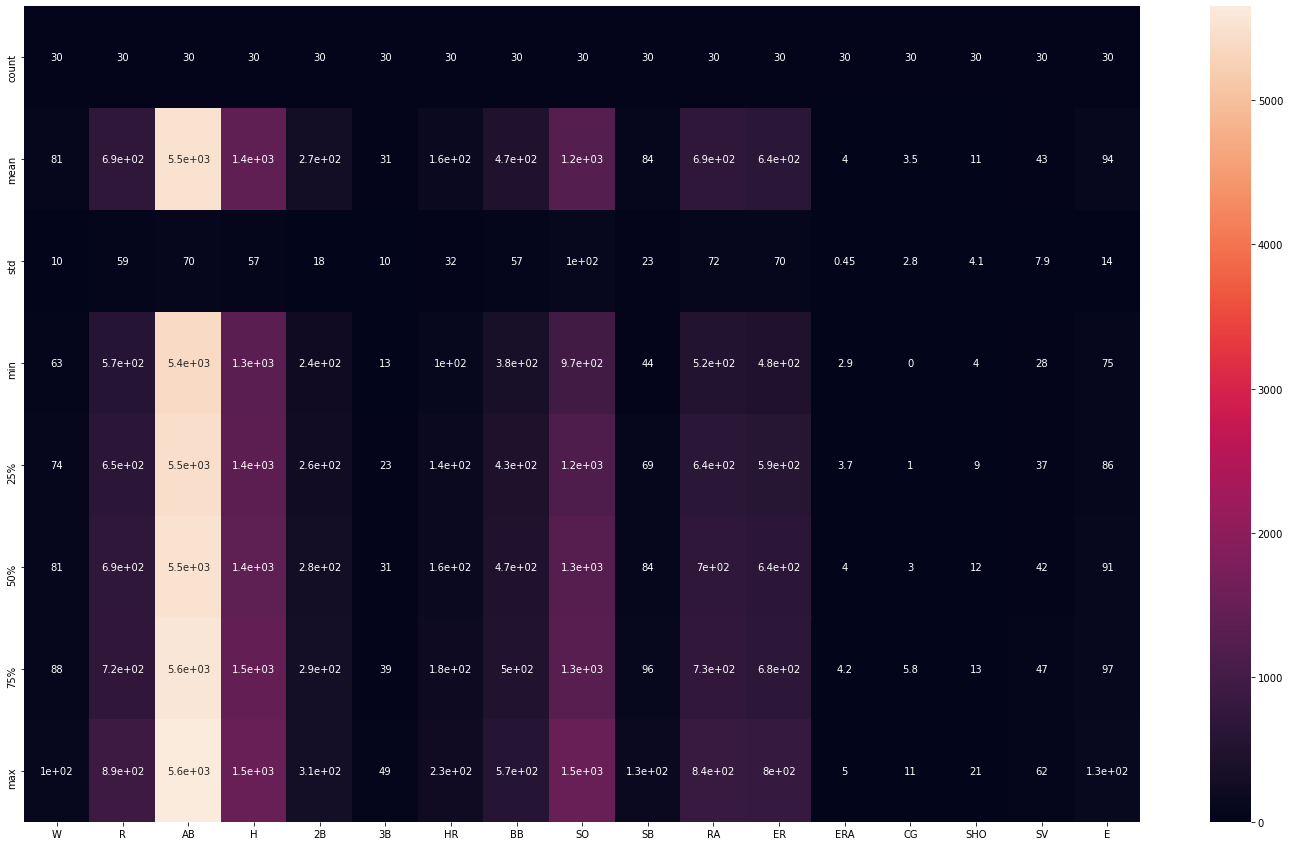

In [81]:
plt.figure(figsize=(25,15))
sns.heatmap(bb.describe(), annot = True)
plt.show()

Stasts looks good except for AB column which has higher values , Need to scale our dataset before creating model

In [82]:
# Checking for null values
bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [83]:
# Checking for duplicated values
bb.duplicated().sum()

0

In [84]:
# Checking correlation
bb.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


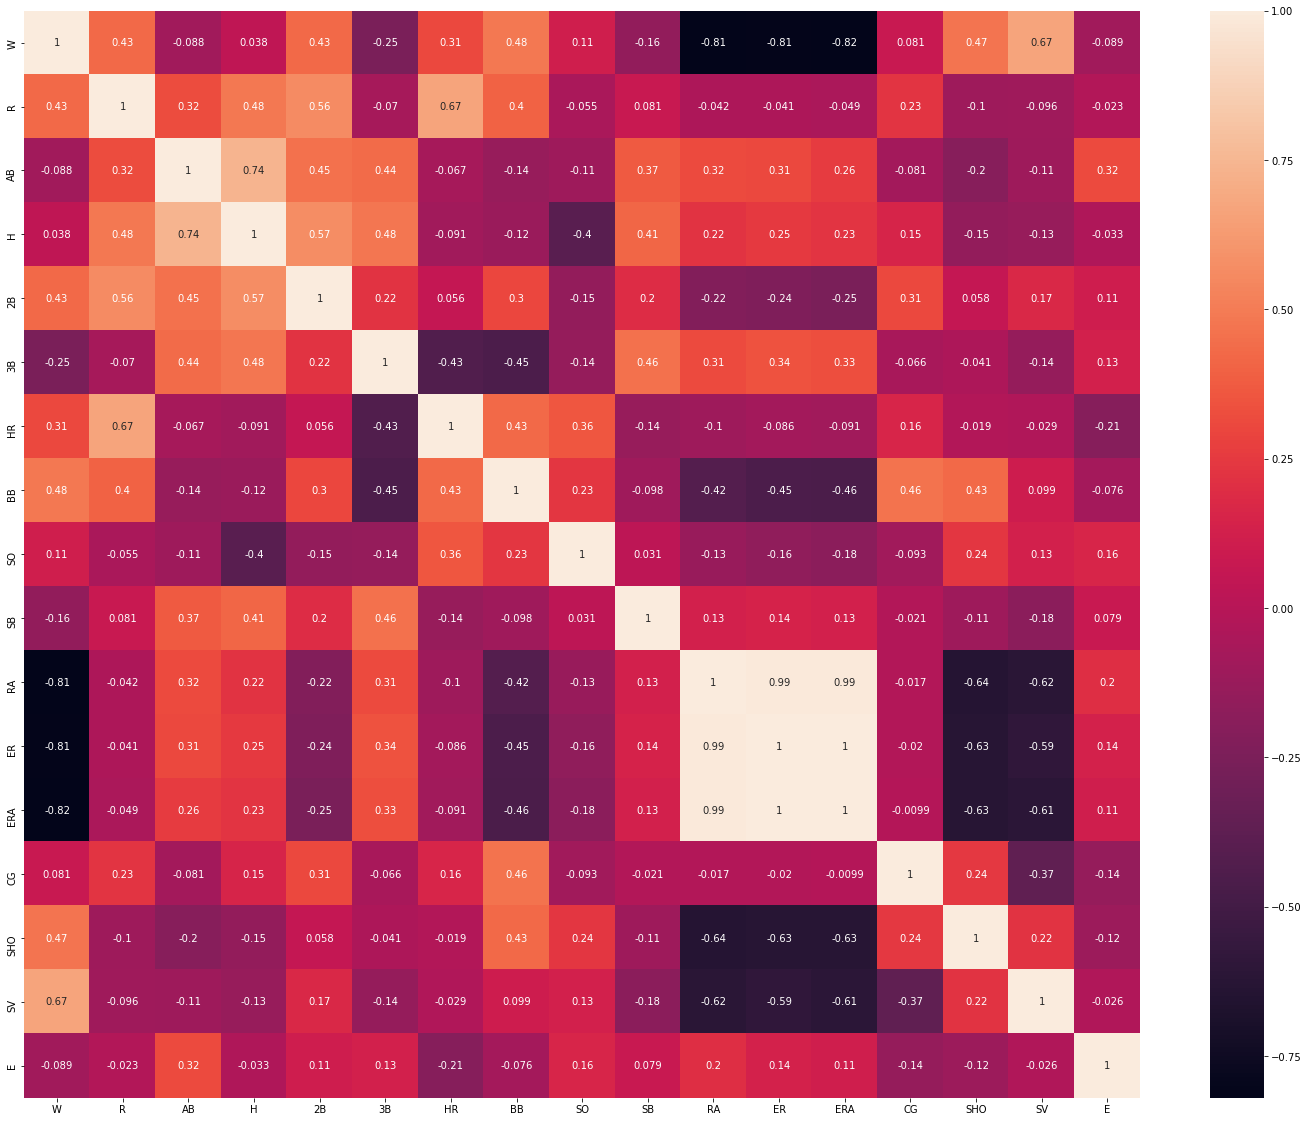

In [85]:
#heatmap
plt.figure(figsize = (25,20))
sns.heatmap(bb.corr(), annot = True)
plt.show()

1.Highest correlation exists between RA / ERA/ ER, as they are calculated based on runs scored
2.columns RA/ERA and ER have strong negative correlation with the target column. Save(Sv) column have strong positive correlation with the target column

In [86]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

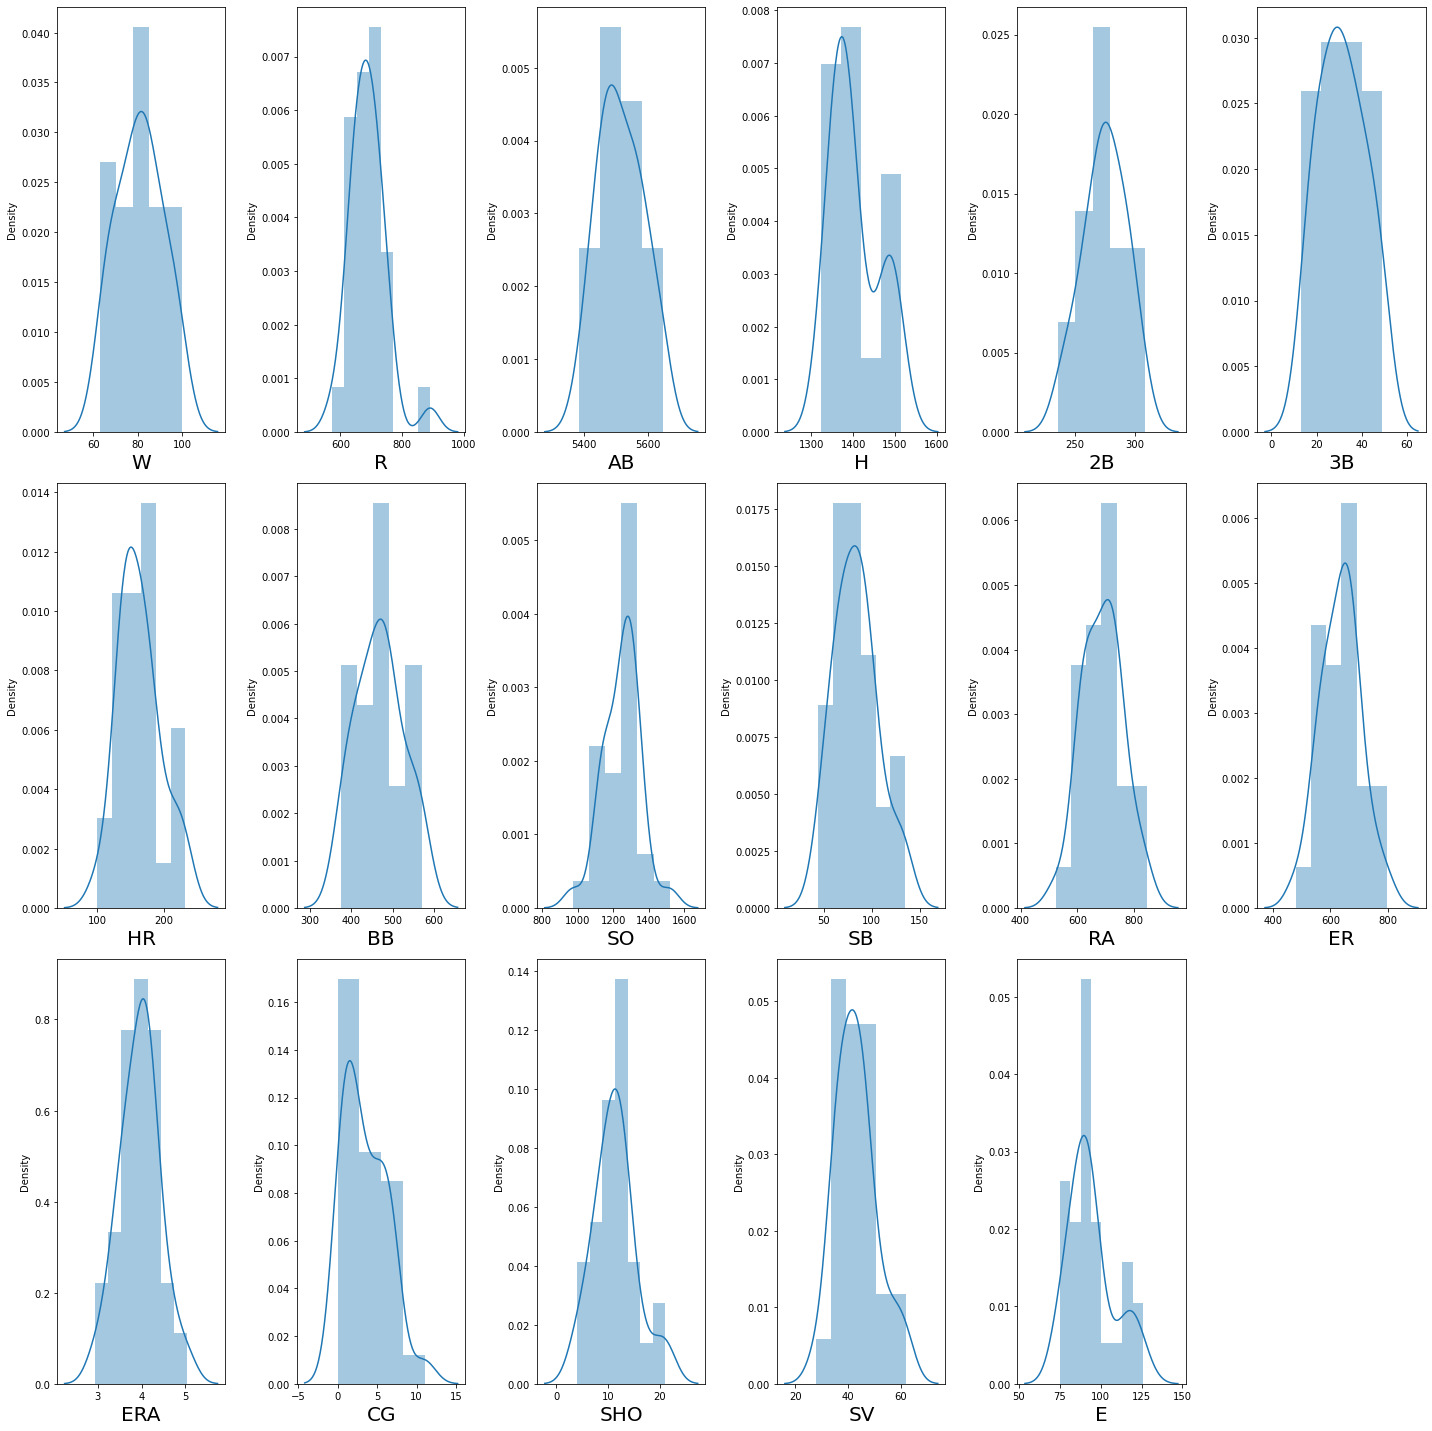

In [87]:
plt.figure(figsize=(20,20), facecolor = 'white')

plotnum = 1

for column in bb:
    if plotnum<=18:
        ax = plt.subplot(3,6,plotnum)
        sns.distplot(bb[column])
        plt.xlabel(column,fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()

Distrubution plots for the all columns shows nearely normal distribution except for the R , H , So , SHO and E . These columns have some skewness and may have outliers

In [88]:
r = bb['R'].sort_index(ascending = True)
r

0     724
1     696
2     669
3     622
4     689
5     891
6     764
7     713
8     644
9     748
10    751
11    729
12    661
13    656
14    694
15    647
16    697
17    689
18    655
19    640
20    683
21    703
22    613
23    573
24    626
25    667
26    696
27    720
28    650
29    737
Name: R, dtype: int64

In [89]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='W'>

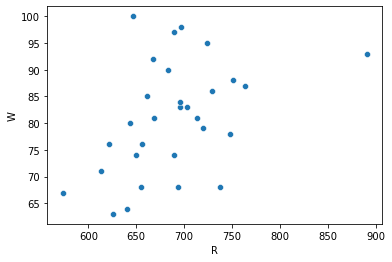

In [90]:
sns.scatterplot(x = 'R', y = 'W', data = bb)

for wins, the runs are scattered between 600 to 750

<AxesSubplot:xlabel='RA', ylabel='W'>

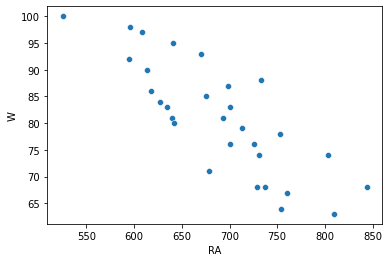

In [91]:
sns.scatterplot(x = 'RA', y = 'W', data = bb)

RA is negatively correlated with the Wins

<AxesSubplot:xlabel='ER', ylabel='W'>

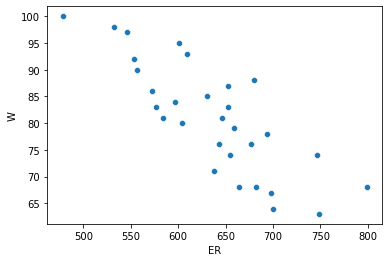

In [92]:
sns.scatterplot(x = 'ER', y = 'W', data = bb)

ER is also negatively correlated with the Wins

<AxesSubplot:xlabel='ERA', ylabel='W'>

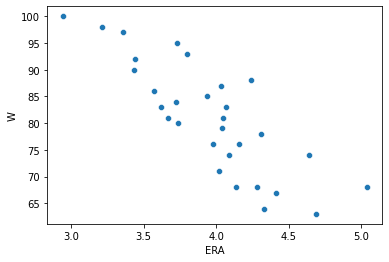

In [93]:
sns.scatterplot(x = 'ERA', y = 'W', data = bb)

ERA is also negatively correlated with the Wins

<AxesSubplot:xlabel='E', ylabel='W'>

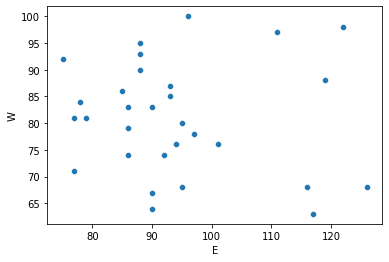

In [94]:
sns.scatterplot(x = 'E', y = 'W', data = bb)

array([<AxesSubplot:title={'center':'W'}>,
       <AxesSubplot:title={'center':'R'}>,
       <AxesSubplot:title={'center':'AB'}>,
       <AxesSubplot:title={'center':'H'}>,
       <AxesSubplot:title={'center':'2B'}>,
       <AxesSubplot:title={'center':'3B'}>,
       <AxesSubplot:title={'center':'HR'}>,
       <AxesSubplot:title={'center':'BB'}>,
       <AxesSubplot:title={'center':'SO'}>,
       <AxesSubplot:title={'center':'SB'}>,
       <AxesSubplot:title={'center':'RA'}>,
       <AxesSubplot:title={'center':'ER'}>,
       <AxesSubplot:title={'center':'ERA'}>,
       <AxesSubplot:title={'center':'CG'}>,
       <AxesSubplot:title={'center':'SHO'}>,
       <AxesSubplot:title={'center':'SV'}>,
       <AxesSubplot:title={'center':'E'}>], dtype=object)

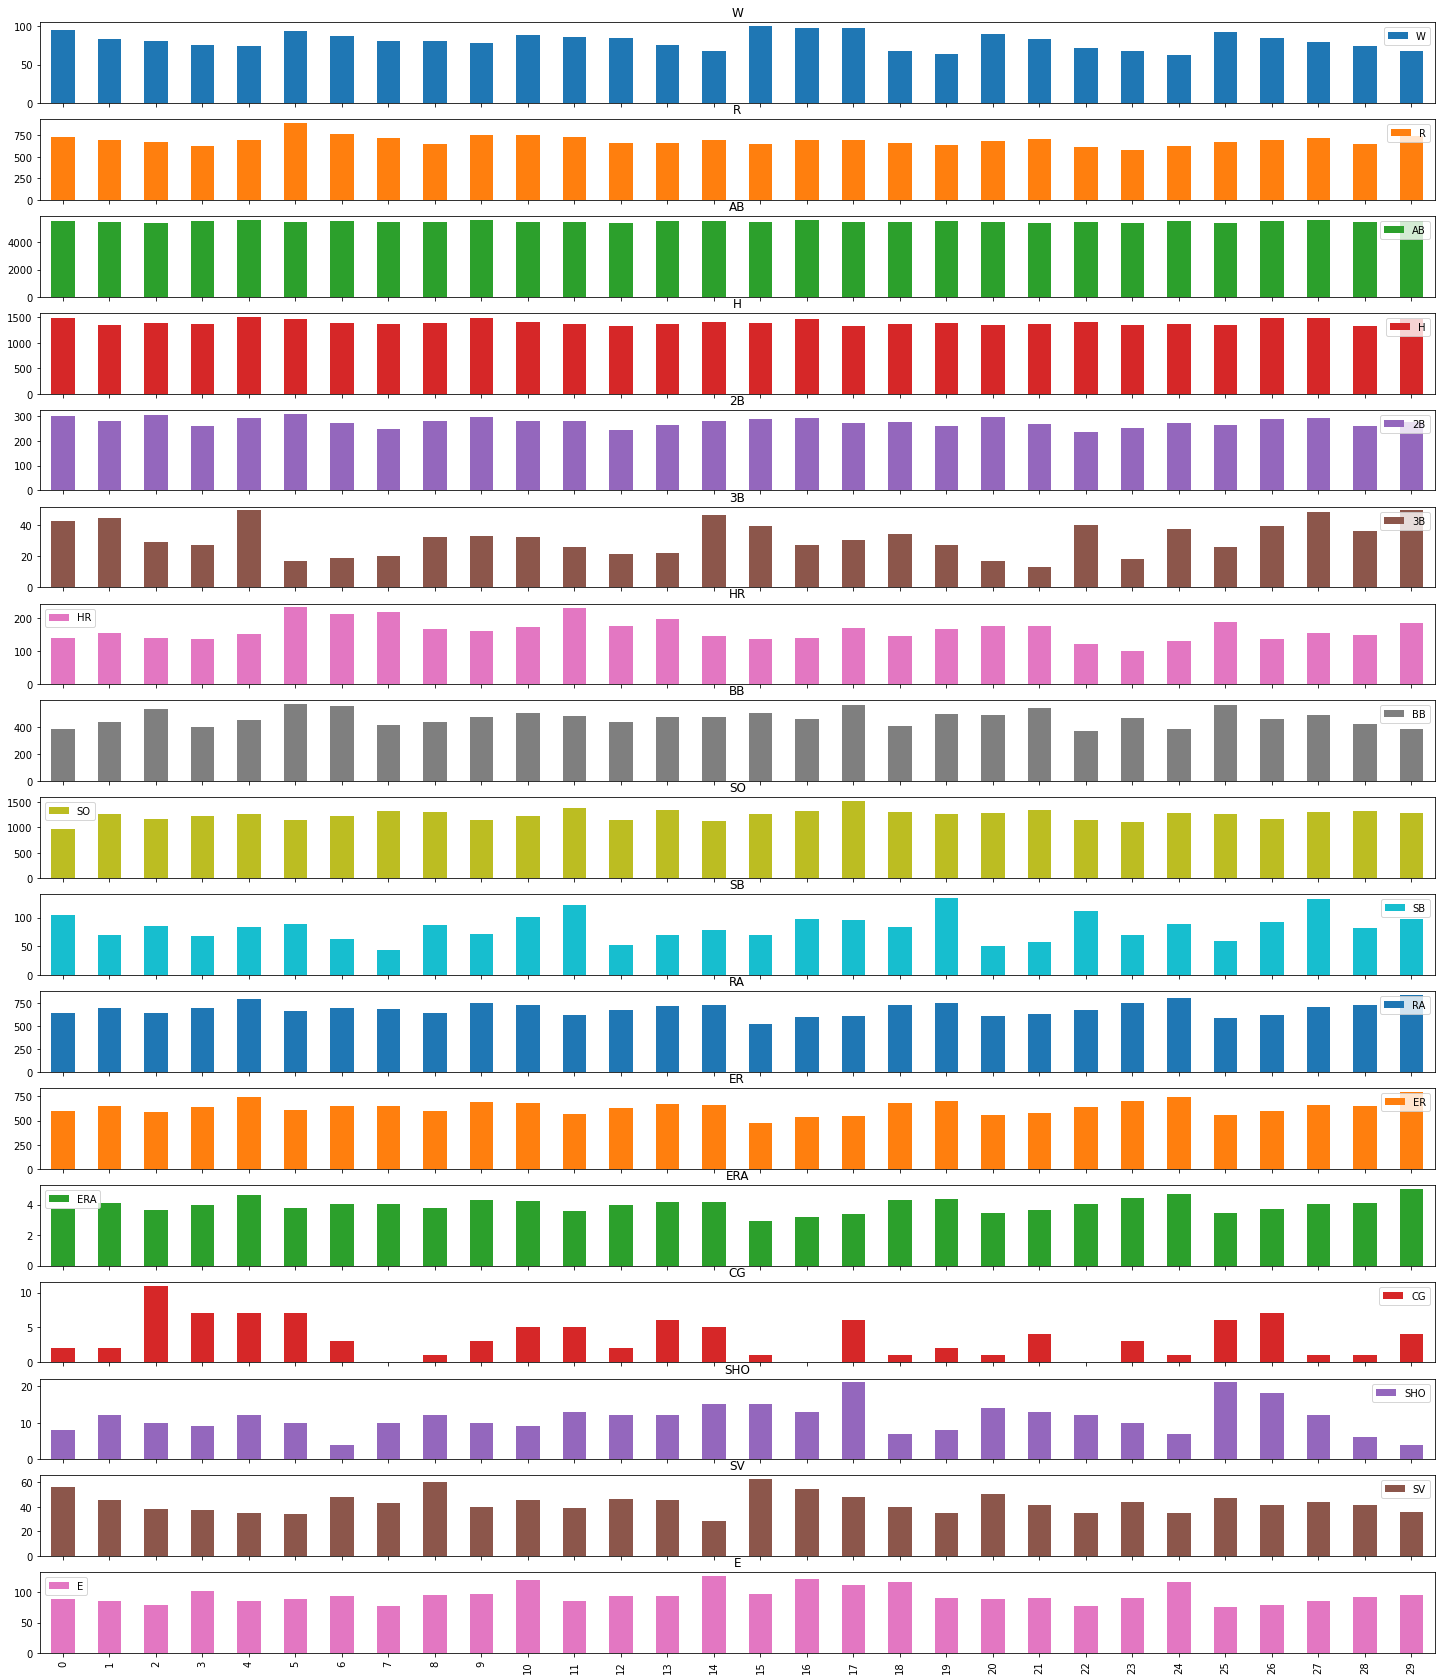

In [95]:
bb.plot.bar(subplots= True,stacked= False, figsize=(25,30))

<AxesSubplot:xlabel='W', ylabel='R'>

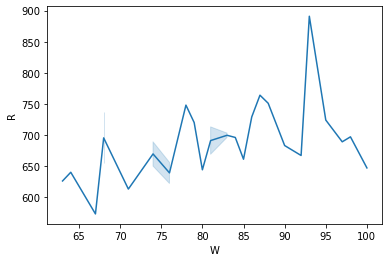

In [96]:
sns.lineplot(x='W',y='R',data=bb)

wins increases with increase in the runs

In [97]:
#skewness check
bb.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

only 1 column has skewness. Hence not changing anything her and will check skewness again later 

In [98]:
col=bb.columns

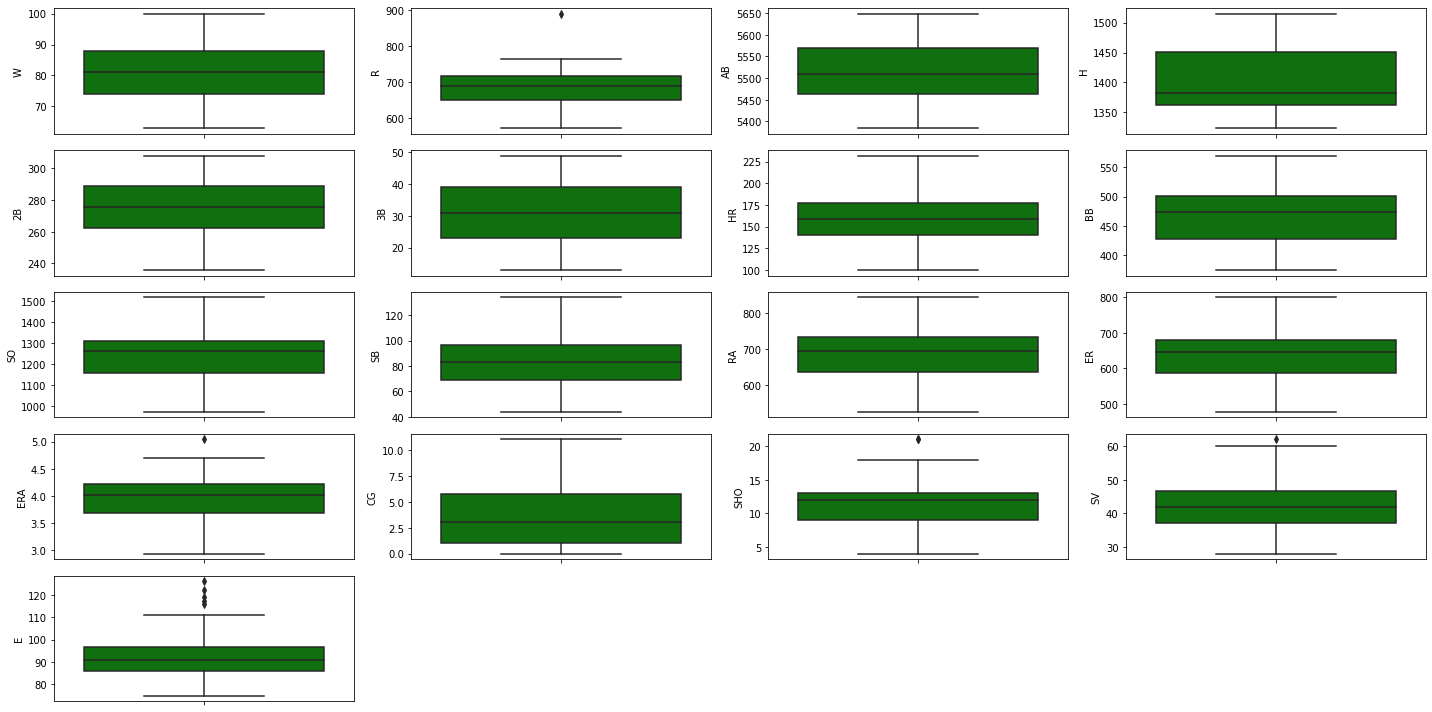

In [99]:
#checking for outliers 
plt.figure(figsize=(20,10))
for i in range(17):
    plt.subplot(5,4,i+1) 
    sns.boxplot(y=bb[col[i]],color='g') 
    plt.tight_layout()  

Outliers present in R, SHO , E,ERA

In [100]:
bb.shape

(30, 17)

In [101]:
# Using z-squre to remove outliers
from scipy.stats import zscore

z_score = zscore(bb[['R','ERA','SHO','E']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

bb= bb[filtering_entry]

In [102]:
bb.shape

(29, 17)

In [103]:
print ('Data lost% is = ', ((1)/30)*100 , '%')

Data lost% is =  3.3333333333333335 %


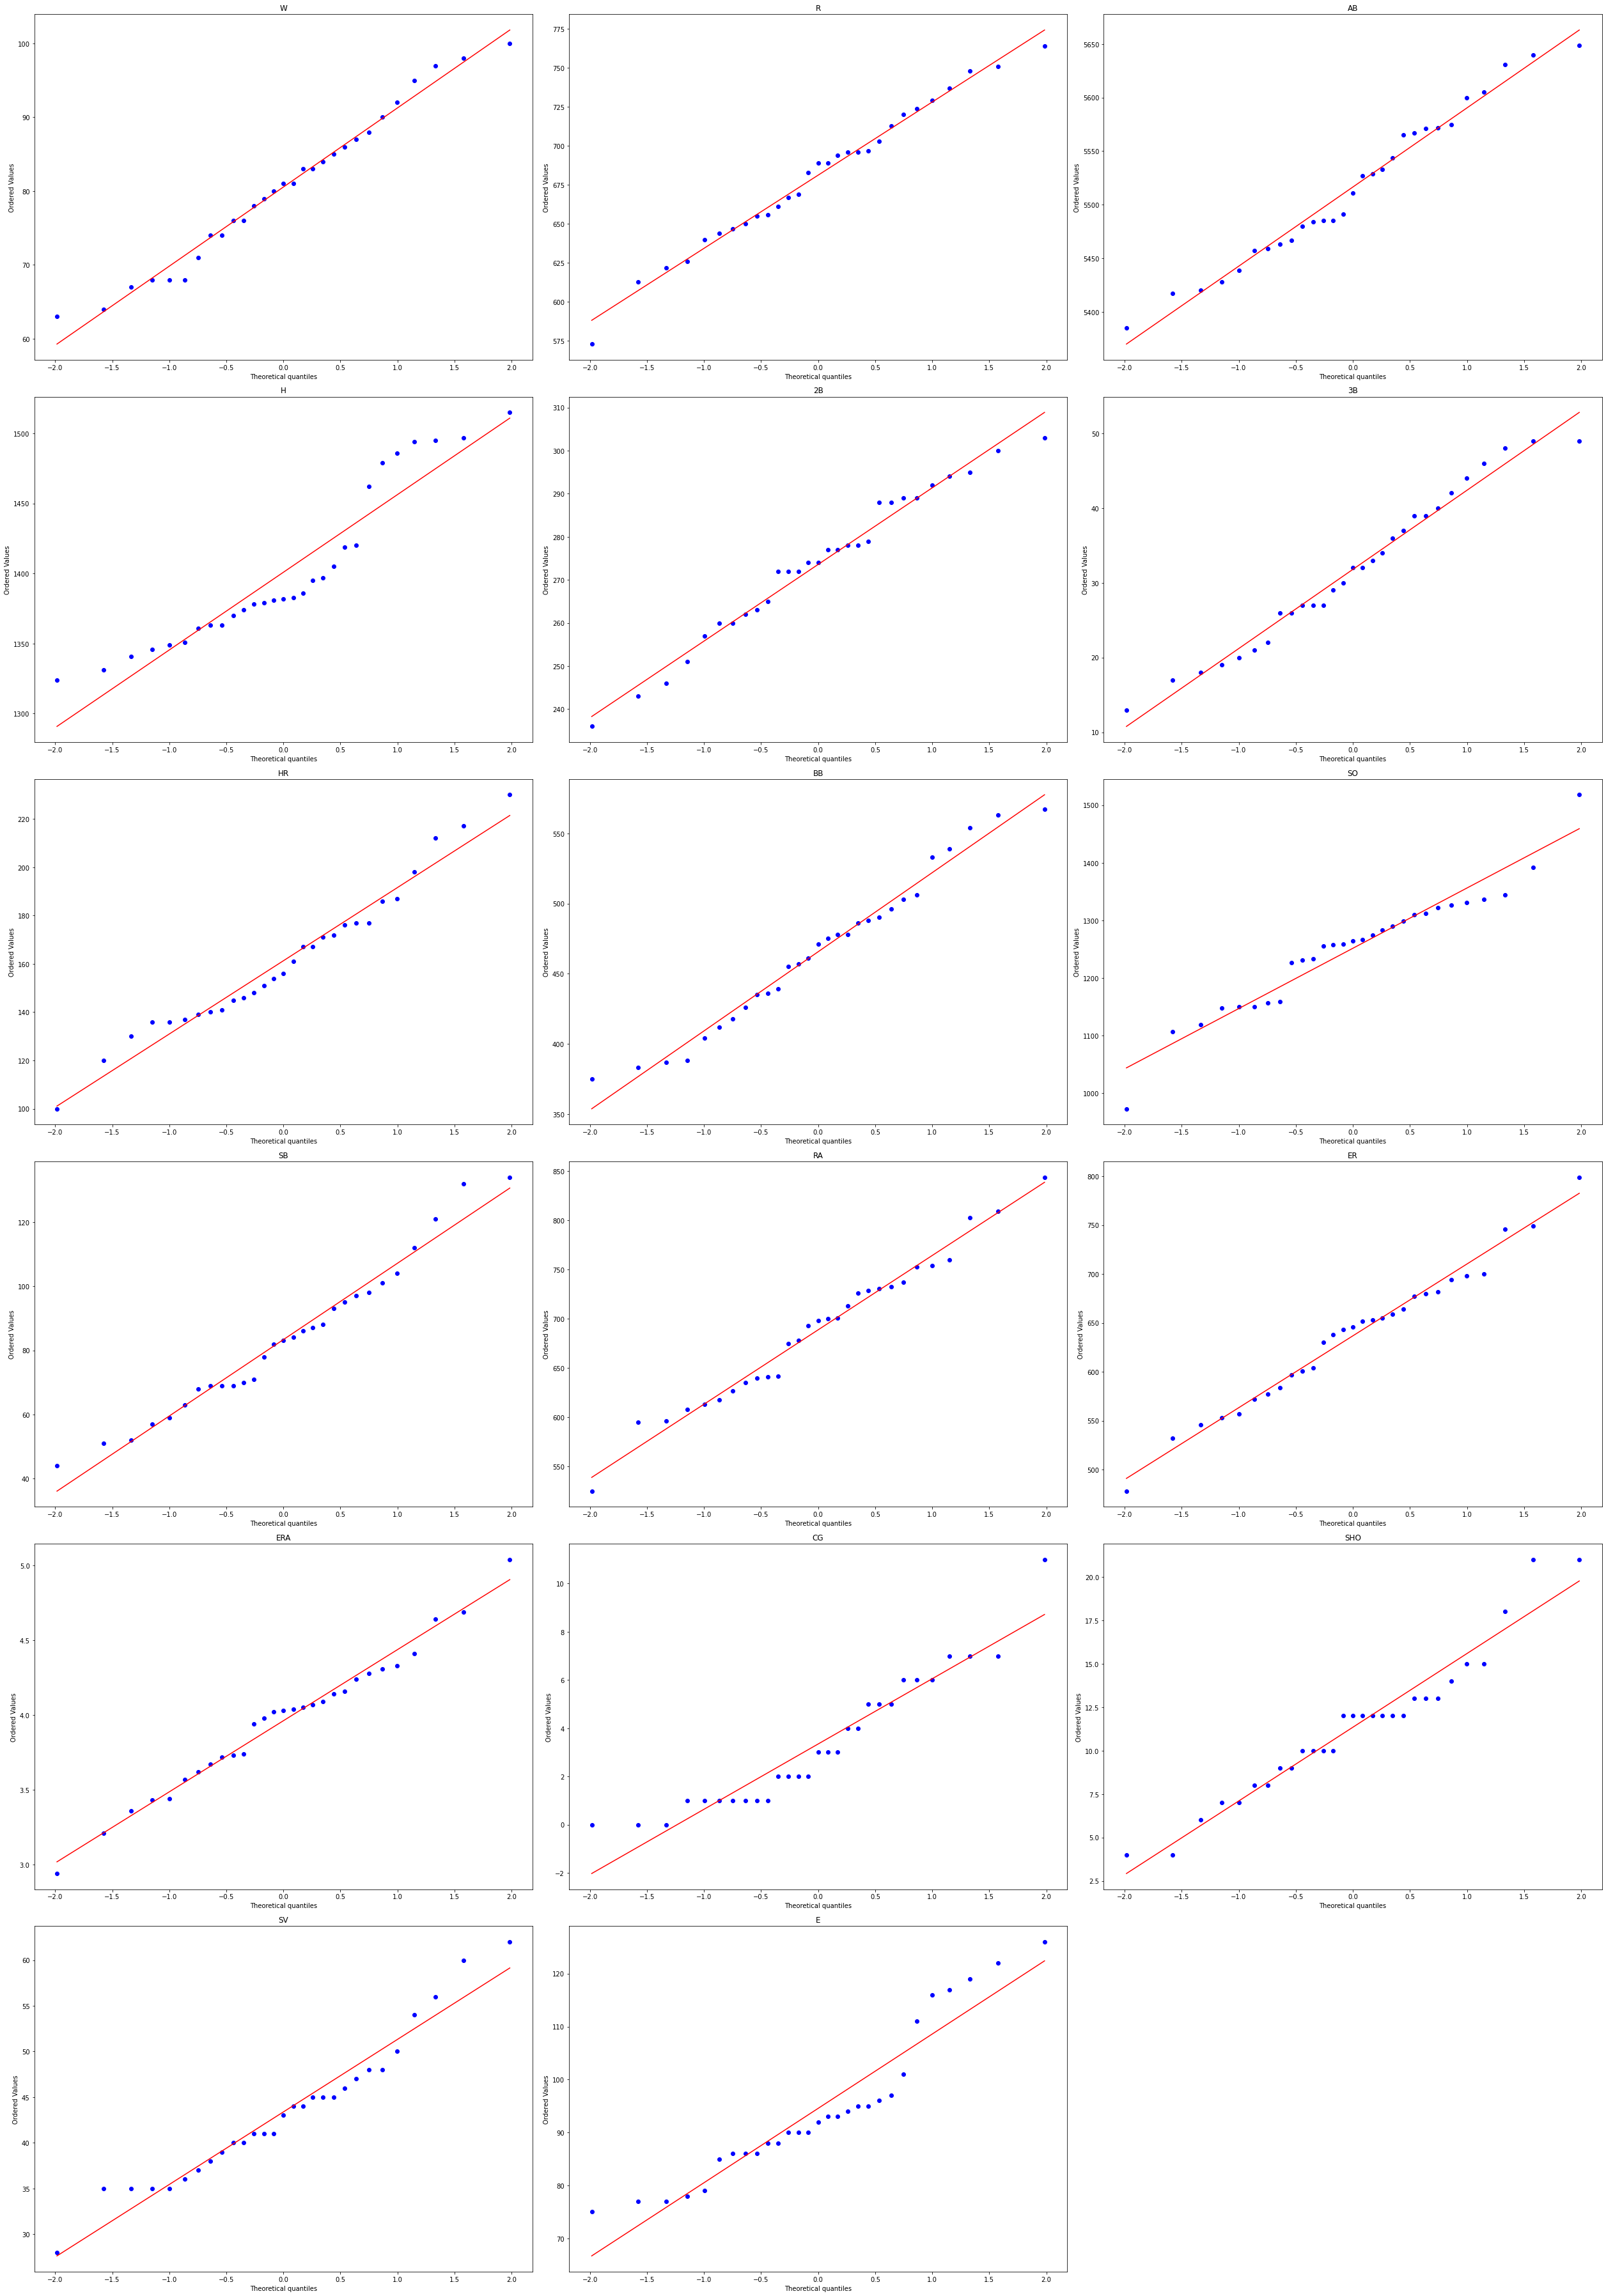

In [104]:
from scipy.stats import probplot
plt.figure(figsize=(35,50))
for i in range(17):
    plt.subplot(6,3,i+1)
    probplot(bb[col[i]],plot=plt,dist='norm')
    plt.title(col[i])
    plt.tight_layout()

In [105]:
# Splitting data as features and target

In [106]:
x = bb.drop('W', axis = 1)
y = bb['W']

In [107]:
# Importing Regression models 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Checking best random state and r2score

In [108]:
def select_model(model):
    max_score=0
    max_state=0
    for i in range(0,400):
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=i
    print("Maximum score is {} with random state {}".format(max_score,max_state))

In [109]:
# Checking for Linear Regression model
select_model(LinearRegression)

Maximum score is 0.8402333261792738 with random state 22


In [110]:
select_model(Ridge)

Maximum score is 0.880195236414385 with random state 332


In [111]:
select_model(KNeighborsRegressor)

Maximum score is 0.7302902055622731 with random state 391


In [112]:
select_model(RandomForestRegressor)

Maximum score is 0.8461785066505442 with random state 391


In [113]:
select_model(AdaBoostRegressor)

Maximum score is 0.8209524902236373 with random state 280


In [114]:
select_model(DecisionTreeRegressor)

Maximum score is 0.8640436708208878 with random state 283


Ridge model is performing better than the other models

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=332)

In [116]:
r=Ridge()
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('Mean Squred Error ',mean_squared_error(y_test,y_pred))
print('Root mean squred ',mean_squared_error(y_test,y_pred,squared=False))
print('mean absolute error ',mean_absolute_error(y_test,y_pred))
print('r2 score ',r2_score(y_test,y_pred))

Mean Squred Error  20.137982711106027
Root mean squred  4.487536374349073
mean absolute error  4.111278764073897
r2 score  0.880195236414385


In [117]:
MSE=cross_val_score(r,x,y,scoring='neg_mean_squared_error',cv=7)
print(MSE)
print('cross value score =  ',MSE.mean())

[ -21.89851533  -42.83769838  -14.61186606 -113.74418088  -31.94899763
  -14.90345953  -17.0562408 ]
cross value score =   -36.71442265911946


Hyper Parameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500,800,950]}


In [120]:
Grid_search =  GridSearchCV(r, param_grid=ridge_params)

In [121]:
Grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300, 500,
                                   800, 950]})

In [122]:
print(Grid_search.best_params_)

{'alpha': 950}


In [123]:
grid_predictions =Grid_search.predict(x_test)

In [124]:
grid_predictions

print('Mean Squred Error is ',mean_squared_error(y_test,grid_predictions))
print('Root mean squred is',mean_squared_error(y_test,grid_predictions,squared=False))
print('mean absolute error is ',mean_absolute_error(y_test,grid_predictions))
print('r2 score is',r2_score(y_test,grid_predictions))

Mean Squred Error is  48.294883715016326
Root mean squred is 6.949452044227395
mean absolute error is  5.71837937472898
r2 score is 0.7126843731630892


Even though after Hyper Parameter tuning, didnt get best results.Hence saving old non-tuned model only

In [125]:
# saving the model
import joblib 
joblib.dump(r,'baseball.pkl')

['baseball.pkl']